In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from sklearn import preprocessing
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,ShuffleSplit,LeaveOneOut
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc,classification_report
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm, zscore
#import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

# Classification Results visualization

In [2]:
pathr="/home/sultan/EEG/Source_Level_Analysis/SVM_results/"
# fnamecl="svm_res_100sam_10ms_clear_v2.csv"
fnameno="svm_res_100sam_10ms_noise_v2.csv"
fnamecl="svm_res_Baseline_100sam_10ms_clear_v2.csv"
tadc =pd.read_csv(pathr+fnamecl)
tadn =pd.read_csv(pathr+fnameno)
# print("Total rows: {0}".format(len(d)))
tr=' (100 trials)';

In [3]:
# plt.plot(dataset.iloc[1:,1],dataset.iloc[1:,2],'-dr')
# plt.show()

# Whole  brain

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


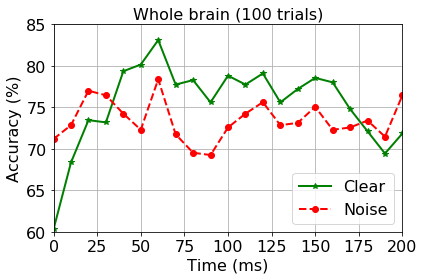

cl: 83.109919571 
no: 78.3933518006


In [4]:
tw1=tadc.iloc[1:,1];Acdw1=tadc.iloc[1:,2]*100;Acdnw1=tadn.iloc[1:,2]*100
axis_font = {'fontname':'Arial', 'size':'16'}
#tw1=tad.iloc[1:,0];Acdw1=tad.iloc[1:,1];
# tw1=tadc.iloc[0:,0];Acdw1=tadc.iloc[0:,1];
# plt.plot(tw1,Acdw1,c='g')
plt.plot(tw1,Acdw1,'g',linewidth=2,marker='*')
plt.plot(tw1, Acdnw1,'--r',linewidth=2,marker='o')
plt.xlim(0,200)
plt.ylim(60,85)
# plt.plot(tw1,Acdw1, 'k--', label='noise')
plt.xlabel('Time (ms)',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
plt.title('Whole brain'+tr,**axis_font)
plt.yticks(**axis_font)
plt.xticks(**axis_font)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('Clear','Noise'),fontsize=16,loc='best')
# plt.savefig('whole_acc_timem.eps')
# plt.savefig('whole_acc_timem.tif')
plt.show()
print 'cl:',max(tadc.iloc[1:,2]*100), '\n', 'no:',max(tadn.iloc[1:,2]*100)

# LH

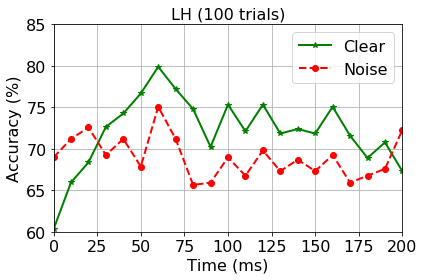

cl: 79.8927613941 
no: 75.0692520776


In [5]:
tw1=tadc.iloc[1:,1];Acdw1=tadc.iloc[1:,3]*100;Acdnw1=tadn.iloc[1:,3]*100
axis_font = {'fontname':'Arial', 'size':'16'}
#tw1=tad.iloc[1:,0];Acdw1=tad.iloc[1:,1];
# tw1=tadc.iloc[0:,0];Acdw1=tadc.iloc[0:,1];
# plt.plot(tw1,Acdw1,c='g')
plt.plot(tw1,Acdw1,'g',linewidth=2,marker='*')
plt.plot(tw1, Acdnw1,'--r',linewidth=2,marker='o')
plt.xlim(0,200)
plt.ylim(60,85)
# plt.plot(tw1,Acdw1, 'k--', label='noise')
plt.xlabel('Time (ms)',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
plt.title('LH'+tr,**axis_font)
plt.yticks(**axis_font)
plt.xticks(**axis_font)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('Clear','Noise'),fontsize=16,loc='best')
# plt.savefig('whole_acc_timem.eps')
# plt.savefig('whole_acc_timem.tif')
plt.show()
print 'cl:',max(tadc.iloc[1:,3]*100), '\n', 'no:',max(tadn.iloc[1:,3]*100)

# RH

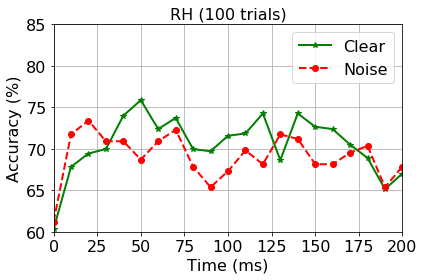

cl: 75.8713136729 
no: 73.4072022161


In [6]:
tw1=tadc.iloc[1:,1];Acdw1=tadc.iloc[1:,4]*100;Acdnw1=tadn.iloc[1:,4]*100
axis_font = {'fontname':'Arial', 'size':'16'}
#tw1=tad.iloc[1:,0];Acdw1=tad.iloc[1:,1];
# tw1=tadc.iloc[0:,0];Acdw1=tadc.iloc[0:,1];
# plt.plot(tw1,Acdw1,c='g')
plt.plot(tw1,Acdw1,'g',linewidth=2,marker='*')
plt.plot(tw1, Acdnw1,'--r',linewidth=2,marker='o')
plt.xlim(0,200)
plt.ylim(60,85)
# plt.plot(tw1,Acdw1, 'k--', label='noise')
plt.xlabel('Time (ms)',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
plt.title('RH'+tr,**axis_font)
plt.yticks(**axis_font)
plt.xticks(**axis_font)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('Clear','Noise'),fontsize=16,loc='best')
# plt.savefig('whole_acc_timem.eps')
# plt.savefig('whole_acc_timem.tif')
plt.show()
print 'cl:',max(tadc.iloc[1:,4]*100), '\n', 'no:',max(tadn.iloc[1:,4]*100)

# Clear maximum accuracuracy versus latency

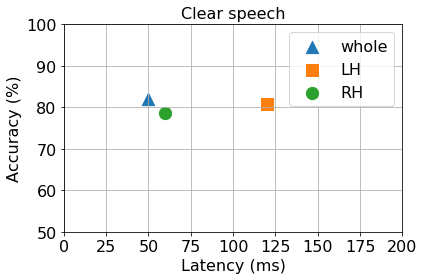

In [7]:
axis_font = {'fontname':'Arial', 'size':'16'}
cw=[82.03];ctw=[50.0];
clh=[80.83];ctlh=[120]
crh=[78.64];ctrh=[60]
# This is data for clear 
cacc=[71.875,68.750,65.625]
ctt=[190.0,170.0, 180.0]
# This data for the noise-degraded sound
nacc=[78.125,75.00,68.750]
ntt=[160.0,160.0, 180.0]
plt.scatter(ctw, cw, marker='^',s=150)
plt.scatter(ctlh, clh,marker='s',s=150,alpha=1.0)
plt.scatter(ctrh, crh,s=150,cmap='spectral')
plt.ylim(50,100)
# plt.plot(,Acdnlh1,'r',linestyle='dashed',linewidth=2)
plt.xlim(0,200)
# plt.plot(tw1,Acdw1, 'k--', label='noise')
plt.xlabel('Latency (ms)',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
plt.title('Clear speech',**axis_font)
plt.yticks(**axis_font)
plt.xticks(**axis_font)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('whole','LH','RH'),fontsize=16,loc='best')
# plt.savefig('Clear_max_acc_time.eps')
# plt.savefig('Clear_max_acc_time.tif')
plt.show()

# Noise maximum accuracuracy versus latency

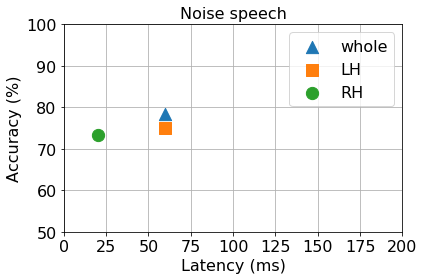

In [8]:
axis_font = {'fontname':'Arial', 'size':'16'}
cw=[78.39];ctw=[60.0];
clh=[75.07];ctlh=[60]
crh=[73.40];ctrh=[20]
# This is data for clear 
cacc=[71.875,68.750,65.625]
ctt=[190.0,170.0, 180.0]
# This data for the noise-degraded sound
nacc=[78.125,75.00,68.750]
ntt=[160.0,160.0, 180.0]
plt.scatter(ctw, cw, marker='^',s=150)
plt.scatter(ctlh, clh,marker='s',s=150,alpha=1.0)
plt.scatter(ctrh, crh,s=150,cmap='spectral')
plt.ylim(50,100)
# plt.plot(,Acdnlh1,'r',linestyle='dashed',linewidth=2)
plt.xlim(0,200)
# plt.plot(tw1,Acdw1, 'k--', label='noise')
plt.xlabel('Latency (ms)',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
plt.title('Noise speech',**axis_font)
plt.yticks(**axis_font)
plt.xticks(**axis_font)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('whole','LH','RH'),fontsize=16,loc='best')
# plt.savefig('Clear_max_acc_time.eps')
# plt.savefig('Clear_max_acc_time.tif')
plt.show()

In [9]:
loc=([np.where(tadc.iloc[1:,4]*100==max(tadc.iloc[1:,4]*100))])
loc

[(array([5]),)]

In [10]:
tw1.iloc[6]

60.0

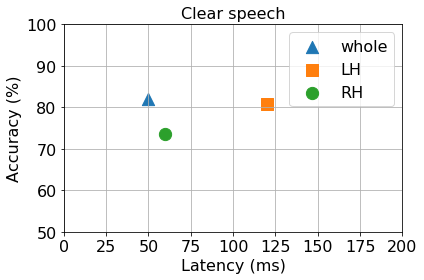

In [11]:
axis_font = {'fontname':'Arial', 'size':'16'}
cw=[82.07];ctw=[50.0];
clh=[80.83];ctlh=[120]
crh=[73.64];ctrh=[60]
# This is data for clear 
cacc=[71.875,68.750,65.625]
ctt=[190.0,170.0, 180.0]
# This data for the noise-degraded sound
nacc=[78.125,75.00,68.750]
ntt=[160.0,160.0, 180.0]
plt.scatter(ctw, cw, marker='^',s=150)
plt.scatter(ctlh, clh,marker='s',s=150,alpha=1.0)
plt.scatter(ctrh, crh,s=150,cmap='spectral')
plt.ylim(50,100)
# plt.plot(,Acdnlh1,'r',linestyle='dashed',linewidth=2)
plt.xlim(0,200)
# plt.plot(tw1,Acdw1, 'k--', label='noise')
plt.xlabel('Latency (ms)',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
plt.title('Clear speech',**axis_font)
plt.yticks(**axis_font)
plt.xticks(**axis_font)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('whole','LH','RH'),fontsize=16,loc='best')
# plt.savefig('Clear_max_acc_time.eps')
# plt.savefig('Clear_max_acc_time.tif')
plt.show()

# Over whole epoch withy Hemisphere

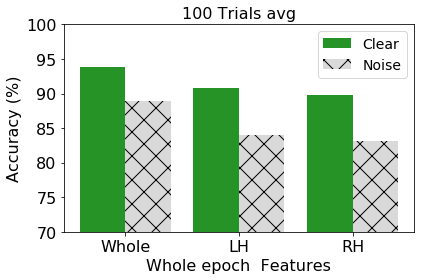

In [12]:
#75sample
n_groups = 3
#50sample
clear = (93.83,90.81,89.81)
noise = (88.91,83.93,83.10)
#75sample
# clear = (91.21,90.81,89.42)
# noise = (87.13,84.56,81.48)
# create plot
axis_font = {'fontname':'Arial', 'size':'16'}
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.40
opacity = 0.85
 #color='lightblue','gray'
rects1 = plt.bar(index, clear, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Clear')
 
rects2 = plt.bar(index + bar_width, noise, bar_width,
                 alpha=opacity,
                 color='lightgray',
                 label='Noise',
                 hatch="x")
plt.xlabel('Whole epoch  Features',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
plt.title('100 Trials avg',**axis_font)
plt.ylim(70,100)
plt.xticks(index + bar_width-0.2, ('Whole','LH', 'RH'),**axis_font)
#plt.xticks(index + bar_width-0.2, (r'$\theta$',r'$\alpha$', r'$\beta$', r'$\gamma$'),**axis_font)
plt.yticks(**axis_font)
plt.legend(fontsize=14)
# plt.grid(True)
plt.tight_layout()
plt.show()
#fig.savefig('LH_band.png')

In [13]:
print "Clear"
tadc

Clear


,Unnamed: 0,time,Whole,LH,RH
0,NaN,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.603217,0.603217,0.603217
2,1.0,10.0,0.683646,0.659517,0.678284
3,2.0,20.0,0.734584,0.683646,0.694370
4,3.0,30.0,0.731903,0.726542,0.699732
5,4.0,40.0,0.793566,0.742627,0.739946
6,5.0,50.0,0.801609,0.766756,0.758713
7,6.0,60.0,0.831099,0.798928,0.723861
8,7.0,70.0,0.777480,0.772118,0.737265
9,8.0,80.0,0.782842,0.747989,0.699732


In [14]:
print "Noise"
tadn

Noise


,Unnamed: 0,time,Whole,LH,RH
0,NaN,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.711911,0.689751,0.612188
2,1.0,10.0,0.728532,0.711911,0.717452
3,2.0,20.0,0.770083,0.725762,0.734072
4,3.0,30.0,0.764543,0.692521,0.709141
5,4.0,40.0,0.742382,0.711911,0.709141
6,5.0,50.0,0.722992,0.678670,0.686981
7,6.0,60.0,0.783934,0.750693,0.709141
8,7.0,70.0,0.717452,0.711911,0.722992
9,8.0,80.0,0.695291,0.656510,0.678670


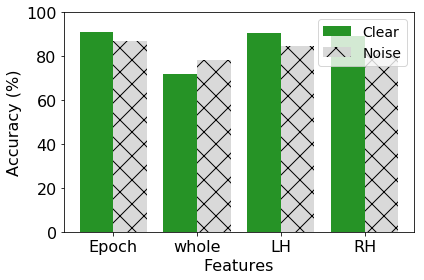

In [15]:
n_groups = 4
# clear = (61.29,54.83,54.83,61.29)
# noise = (85, 62, 54, 20)
#Random shuffle
clear = (91.21,71.875,90.81,89.42)
noise = (87.13,78.125,84.56,81.48)
# create plot
axis_font = {'fontname':'Arial', 'size':'16'}
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.40
opacity = 0.85
 #color='lightblue','gray'
rects1 = plt.bar(index, clear, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Clear')
 
rects2 = plt.bar(index + bar_width, noise, bar_width,
                 alpha=opacity,
                 color='lightgray',
                 label='Noise',
                 hatch="x")
plt.xlabel('Features',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
# plt.title('LH',**axis_font)
plt.ylim(0,100)
plt.xticks(index + bar_width-0.2, ('Epoch','whole','LH', 'RH'),**axis_font)
#plt.xticks(index + bar_width-0.2, (r'$\theta$',r'$\alpha$', r'$\beta$', r'$\gamma$'),**axis_font)
plt.yticks(**axis_font)
plt.legend(fontsize=14,loc="best")
plt.tight_layout()
plt.show()
#fig.savefig('LH_band.png')